# Load Quora Data

- id - the id of a training set question pair
- qid1, qid2 - unique ids of each question (only available in train.csv)
- question1, question2 - the full text of each question
- is_duplicate - the target variable,
- set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.

In [7]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.shape

(404290, 6)

In [5]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


# Load Gl0ve Data

In [8]:
embeddings_index = {}
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


## Decompose questions into vector Sets

In [18]:
embeddings_index["is"]

array([-0.54263997,  0.41475999,  1.03219998, -0.40244001,  0.46691   ,
        0.21816   , -0.074864  ,  0.47332001,  0.080996  , -0.22079   ,
       -0.12808   , -0.1144    ,  0.50891   ,  0.11568   ,  0.028211  ,
       -0.3628    ,  0.43823001,  0.047511  ,  0.20282   ,  0.49857   ,
       -0.10068   ,  0.13269   ,  0.16971999,  0.11653   ,  0.31355   ,
        0.25713   ,  0.092783  , -0.56826001, -0.52974999, -0.051456  ,
       -0.67325997,  0.92532998,  0.26930001,  0.22734   ,  0.66364998,
        0.26221001,  0.19719   ,  0.26089999,  0.18774   , -0.34540001,
       -0.42635   ,  0.13975   ,  0.56338   , -0.56906998,  0.12398   ,
       -0.12894   ,  0.72483999, -0.26104999, -0.26313999, -0.43605   ,
        0.078908  , -0.84145999,  0.51595002,  1.39970005, -0.76459998,
       -3.14529991, -0.29201999, -0.31246999,  1.51289999,  0.52434999,
        0.21456   ,  0.42451999, -0.088411  , -0.17805   ,  1.18760002,
        0.10579   ,  0.76571   ,  0.21913999,  0.35824001, -0.11

In [69]:
import re, string
sentence = train.iloc[0].question1
print sentence

def w2v(sentence):
    s_w2v = []
    try:
        sentence.split(" ")
    except:
        return [0]
    for word in sentence.split(" "):
        s = word.lower()
        s = s.translate(None, string.punctuation)
        try:
            s_w2v.append(embeddings_index[s])
        except:
            continue
#             print "{} not found".format(word)
    return s_w2v
    

What is the step by step guide to invest in share market in india?


In [67]:
train['s1_w2v'] = train['question1'].apply(lambda sentence: w2v(sentence))

What is the step by step guide to invest in share market in india?


In [70]:
train['q2_w2v'] = train['question2'].apply(lambda sentence: w2v(sentence))

In [71]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate,s1_w2v,cosine_similarity,sum1,x,q2_w2v
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[[-0.1518, 0.38409, 0.8934, -0.42421, -0.92161...",NaN,-50.596165,1,"[[-0.1518, 0.38409, 0.8934, -0.42421, -0.92161..."
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[[-0.1518, 0.38409, 0.8934, -0.42421, -0.92161...",NaN,-0.227900,1,"[[-0.1518, 0.38409, 0.8934, -0.42421, -0.92161..."
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[[-0.23769, 0.59392, 0.58697, -0.041788, -0.86...",NaN,9.523548,1,"[[-0.23769, 0.59392, 0.58697, -0.041788, -0.86..."
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[[0.1845, 0.51461, 0.65342, -0.42173, -0.8143,...",NaN,-22.359777,1,"[[-0.13778, 0.47448, 0.30845, -0.0065366, -0.3..."
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[[0.03024, 0.44606, 0.43166, -0.37528, 0.29068...",NaN,-15.793522,1,"[[0.03024, 0.44606, 0.43166, -0.37528, 0.29068..."


## Find Cosine Distance between Questions

In [101]:
from scipy.spatial.distance import cosine
from scipy.spatial import distance


def compute_distance(u,v):
    u, v = embeddings_index[u], embeddings_index[v]
    def func(arg):
        return arg(u,v)
    return func

map(compute_distance('president', 'president'), [
            scipy.spatial.distance.braycurtis, 
            scipy.spatial.distance.euclidean, 
            scipy.spatial.distance.correlation, 
            scipy.spatial.distance.cosine])

[0.0, 0.0, -2.5939578485179027e-08, -9.0480792636071783e-08]

In [81]:
def similar_questions(q1, q2):
    try:
        return cosine(np.sum(q1), np.sum(q2))
    except:
        return np.array()

In [56]:
q1 = train['s1_w2v'].iloc[0]
q2 = train['s1_w2v'].iloc[2]

similar_questions(q1, q2)

2.0000000029710243

In [76]:
train['sum1'] = train.s1_w2v.apply(lambda x: np.sum(x, axis=0))

In [78]:
train['sum2'] = train.q2_w2v.apply(lambda x: np.sum(x, axis=0))

In [79]:
train.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,s1_w2v,cosine_similarity,sum1,x,q2_w2v,sum2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[[-0.1518, 0.38409, 0.8934, -0.42421, -0.92161...",NaN,"[-1.34202, 1.35613, 5.45662, 1.91644, 1.53763,...",1,"[[-0.1518, 0.38409, 0.8934, -0.42421, -0.92161...","[-0.468055, 1.27019, 4.39041, 0.746311, 1.1517..."
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[[-0.1518, 0.38409, 0.8934, -0.42421, -0.92161...",NaN,"[0.933486, -0.01832, 2.23776, -0.85669, 0.6340...",1,"[[-0.1518, 0.38409, 0.8934, -0.42421, -0.92161...","[1.79331, 0.238847, 4.55605, -1.92453, -1.7166..."


In [89]:
train.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,s1_w2v,cosine_similarity,sum1,x,q2_w2v,sum2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[[-0.1518, 0.38409, 0.8934, -0.42421, -0.92161...",-5.620243e-09,"[-1.34202, 1.35613, 5.45662, 1.91644, 1.53763,...",1,"[[-0.1518, 0.38409, 0.8934, -0.42421, -0.92161...","[-0.468055, 1.27019, 4.39041, 0.746311, 1.1517..."
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[[-0.1518, 0.38409, 0.8934, -0.42421, -0.92161...",-2.493152e-08,"[0.933486, -0.01832, 2.23776, -0.85669, 0.6340...",1,"[[-0.1518, 0.38409, 0.8934, -0.42421, -0.92161...","[1.79331, 0.238847, 4.55605, -1.92453, -1.7166..."


In [88]:
train['cosine_similarity'] = train.apply(lambda x: similar_questions(x[8],x[11]), 1)

/Users/ingridspielman/.virtualenvs/test/lib/python2.7/site-packages/scipy/spatial/distance.py:326: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - np.dot(u, v) / (norm(u) * norm(v))


## Visualize Data

In [93]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12da00fd0>]], dtype=object)

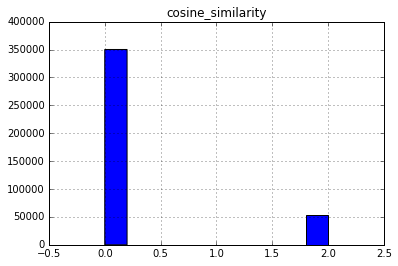

In [94]:
train[['cosine_similarity']].hist(bins=10)

In [95]:
import matplotlib.pyplot as plt

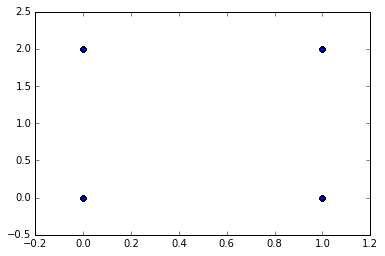

In [97]:
plt.scatter(x='is_duplicate', y='cosine_similarity', data=train, alpha=.1)

In [99]:
train['is_duplicate'][train['cosine_similarity'] < 1].value_counts()

0    215359
1    134673
Name: is_duplicate, dtype: int64

In [100]:
train['is_duplicate'][train['cosine_similarity'] > 1].value_counts()

0    39645
1    14590
Name: is_duplicate, dtype: int64

# Scrape more Quora Questions

# Contractions

In [ ]:
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}